In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import plt
plt.style.use('seaborn')

In [2]:
import precios as pc

In [3]:
df = pc.datos('2019-1-1')

In [4]:
del df['ipc']

In [5]:
df_retornos = np.log(df/df.shift(1))
df_retornos.dropna(inplace = True)

In [6]:
df_retornos.sum()

ac            0.002562
alfaa        -0.290116
alpeka       -0.094821
alsea        -0.068993
amxl          0.033462
asurb        -0.007311
bimboa       -0.094344
bolsaa        0.085288
cemexcpo     -0.291442
elektra       0.380721
femsaubd      0.066257
gapb          0.166952
gcarsoa1     -0.222414
gmexicob      0.098829
grumab       -0.095057
ienova        0.095664
kimbera       0.261606
kofubl        0.001737
labb          0.464330
livepolc1    -0.178241
megacpo      -0.081603
omab          0.193361
orbia        -0.256608
penoles       0.024329
pinfra       -0.044374
tlevisacpo   -0.252637
walmex        0.169773
dtype: float64

In [7]:
serie_retornos_promedios = df_retornos.mean()

In [8]:
serie_retornos_promedios

ac            0.000013
alfaa        -0.001519
alpeka       -0.000496
alsea        -0.000361
amxl          0.000175
asurb        -0.000038
bimboa       -0.000494
bolsaa        0.000447
cemexcpo     -0.001526
elektra       0.001993
femsaubd      0.000347
gapb          0.000874
gcarsoa1     -0.001164
gmexicob      0.000517
grumab       -0.000498
ienova        0.000501
kimbera       0.001370
kofubl        0.000009
labb          0.002431
livepolc1    -0.000933
megacpo      -0.000427
omab          0.001012
orbia        -0.001343
penoles       0.000127
pinfra       -0.000232
tlevisacpo   -0.001323
walmex        0.000889
dtype: float64

In [9]:
serie_retornos_promedio_anual = serie_retornos_promedios *252
serie_retornos_promedio_anual

ac            0.003381
alfaa        -0.382771
alpeka       -0.125105
alsea        -0.091027
amxl          0.044148
asurb        -0.009645
bimboa       -0.124475
bolsaa        0.112527
cemexcpo     -0.384520
elektra       0.502313
femsaubd      0.087417
gapb          0.220272
gcarsoa1     -0.293446
gmexicob      0.130392
grumab       -0.125416
ienova        0.126216
kimbera       0.345156
kofubl        0.002292
labb          0.612623
livepolc1    -0.235166
megacpo      -0.107664
omab          0.255115
orbia        -0.338561
penoles       0.032099
pinfra       -0.058546
tlevisacpo   -0.333322
walmex        0.223994
dtype: float64

In [10]:
serie_sigma = df_retornos.std()
serie_sigma

ac            0.011574
alfaa         0.018524
alpeka        0.014902
alsea         0.017138
amxl          0.015391
asurb         0.014294
bimboa        0.015540
bolsaa        0.014325
cemexcpo      0.021137
elektra       0.012891
femsaubd      0.010156
gapb          0.015868
gcarsoa1      0.019434
gmexicob      0.019536
grumab        0.011330
ienova        0.017863
kimbera       0.016861
kofubl        0.011055
labb          0.021161
livepolc1     0.015072
megacpo       0.015941
omab          0.015303
orbia         0.018613
penoles       0.023652
pinfra        0.014105
tlevisacpo    0.022561
walmex        0.014812
dtype: float64

In [11]:
serie_sigma_anual = serie_sigma * np.sqrt(252)
serie_sigma_anual

ac            0.183734
alfaa         0.294060
alpeka        0.236561
alsea         0.272059
amxl          0.244318
asurb         0.226915
bimboa        0.246684
bolsaa        0.227400
cemexcpo      0.335537
elektra       0.204641
femsaubd      0.161220
gapb          0.251894
gcarsoa1      0.308506
gmexicob      0.310125
grumab        0.179863
ienova        0.283567
kimbera       0.267663
kofubl        0.175497
labb          0.335920
livepolc1     0.239263
megacpo       0.253052
omab          0.242930
orbia         0.295474
penoles       0.375461
pinfra        0.223904
tlevisacpo    0.358146
walmex        0.235125
dtype: float64

In [12]:
acciones = pc.componentes()

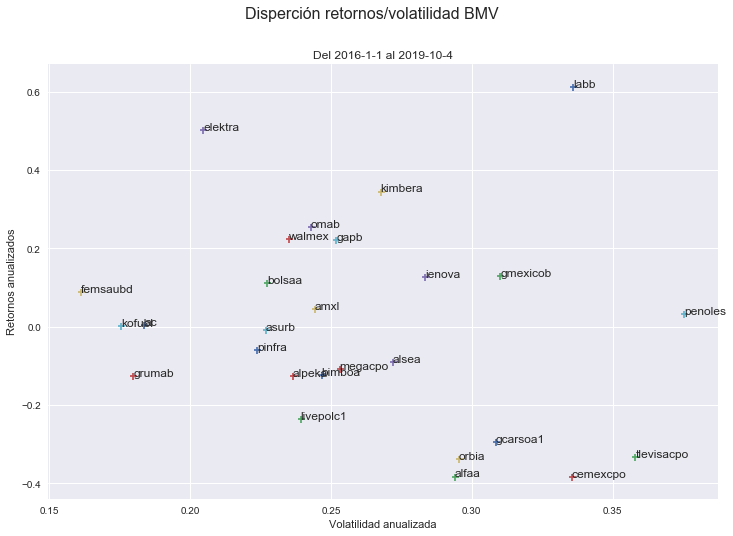

In [13]:
plt.figure(figsize = (12, 8))

plt.suptitle('Disperción retornos/volatilidad BMV', 
             fontsize = 16)

plt.title('Del 2016-1-1 al 2019-10-4')

plt.xlabel('Volatilidad anualizada')
plt.ylabel('Retornos anualizados')

for accion in acciones:
    
    if accion != 'ipc':
        plt.scatter(serie_sigma_anual[accion], 
                    serie_retornos_promedio_anual[accion], marker='+',
                   label = accion)
        plt.text(serie_sigma_anual[accion],
                 serie_retornos_promedio_anual[accion], accion,
                 fontsize = 12)

In [14]:
rf = 0.0755

sharp_ratio = (serie_retornos_promedio_anual - rf) / serie_sigma_anual

In [15]:
sharp_ratio.sort

ac           -0.392521
alfaa        -1.558427
alpeka       -0.848004
alsea        -0.612099
amxl         -0.128323
asurb        -0.375231
bimboa       -0.810652
bolsaa        0.162829
cemexcpo     -1.370998
elektra       2.085665
femsaubd      0.073921
gapb          0.574731
gcarsoa1     -1.195914
gmexicob      0.176998
grumab       -1.117054
ienova        0.178849
kimbera       1.007446
kofubl       -0.417148
labb          1.598961
livepolc1    -1.298430
megacpo      -0.723822
omab          0.739371
orbia        -1.401347
penoles      -0.115594
pinfra       -0.598675
tlevisacpo   -1.141496
walmex        0.631553
dtype: float64